# A Physics-Informed BiLSTM Autoencoder with Adaptive Physics Loss Weighting for Anomaly Detection on Damped Oscillator Data

In [33]:
# Imports
import sys, importlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)


## Simulation

In [34]:
sys.path.append('../utils')

import simulation
importlib.reload(simulation)
from simulation import simulate_trajectory, generate_dataset

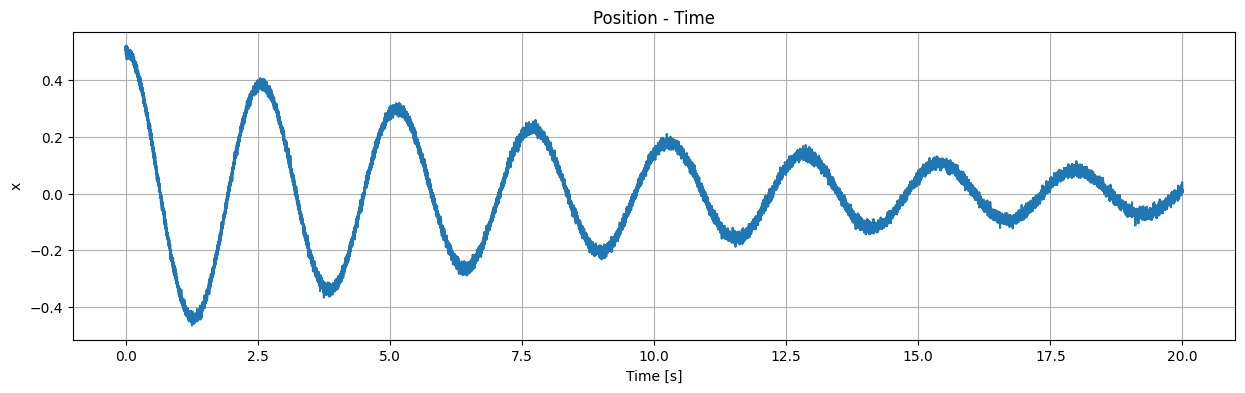

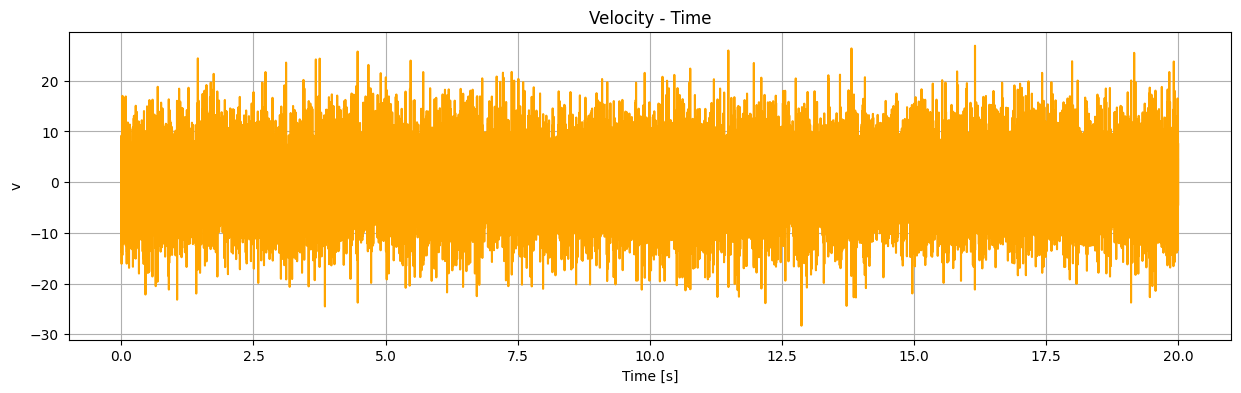

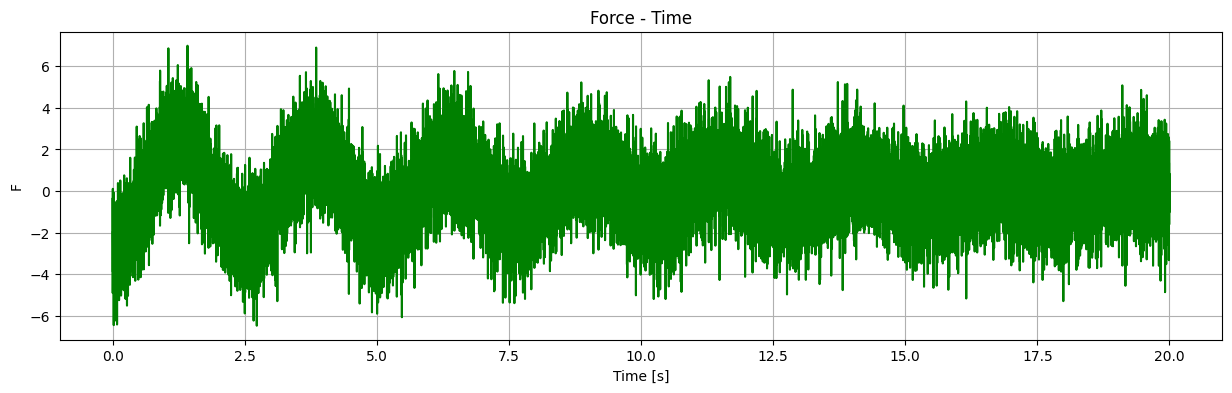

In [35]:
# Run a simulation (normal) for visualization and setup clarity

# Parameters
m = 1.0
c = 0.2
k = 6.0
x0 = 0.5
v0 = 0.0

T = 20.0
dt = 0.001

t, x = simulate_trajectory(m, c, k, x0, v0, T=T, dt=dt, noise_std=0.01)
v = np.gradient(x, dt)
F = -c * v - k * x

# Dynamics plots
plt.figure(figsize=(15, 4))
plt.plot(t, x, label="x(t)")
plt.title("Position - Time")
plt.xlabel("Time [s]")
plt.ylabel("x")
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 4))
plt.plot(t, v, label="v(t)", color='orange')
plt.title("Velocity - Time")
plt.xlabel("Time [s]")
plt.ylabel("v")
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 4))
plt.plot(t, F, label="F(t)", color='green')
plt.title("Force - Time")
plt.xlabel("Time [s]")
plt.ylabel("F")
plt.grid(True)
plt.show()

In [36]:
# Use generate_dataset function that runs the simulation + injects anomalies + windows data (size 1000) + save dataset in ../data/simulation.npz

generate_dataset(
    num_trajectories = 5,
    save_path = "../data/dataset.npz"
)

Saved dataset to ../data/dataset.npz. Shape: (95, 1000), Labels: (95,)


In [37]:
# Load to verify saving successful and shape of dataset
data = np.load("../data/dataset.npz")
print("X shape:", data["X"].shape)
print("y shape:", data["y"].shape)

X shape: (95, 1000)
y shape: (95,)


Now we have 95 windows, each containing 1000 samples

## Data Preprocessing

In [42]:
sys.path.append('../utils')

import preprocessing
importlib.reload(preprocessing)
from preprocessing import preprocess_dataset

In [43]:
raw_path = "../data/dataset.npz"
save_path = "../data/preprocessed_dataset.npz"

# Run main pipeline
data_split, scaler = preprocess_dataset(raw_path=raw_path, save_path=save_path)

# Show shape and basic stats of preprocessed data
print("Shapes:")
print("X_train:", data_split["X_train"].shape)
print("X_val  :", data_split["X_val"].shape)
print("X_test :", data_split["X_test"].shape)

print("\nLabels distribution:")
print("Train normal only  ->", data_split["y_train"].sum(), "(should be 0)")
print("Val anomalies:     ->", data_split["y_val"].sum())
print("Test anomalies:    ->", data_split["y_test"].sum())

print("\nScaler mean/std:")
print("Mean:", scaler.mean_)
print("Std :", scaler.scale_)

print("\nPreprocessed dataset saved as:", save_path)

Saved preprocessed dataset to ../data/preprocessed_dataset.npz
Preprocessing complete.
Shapes:
X_train: (62, 1000)
X_val  : (14, 1000)
X_test : (19, 1000)

Labels distribution:
Train normal only  -> 0 (should be 0)
Val anomalies:     -> 3
Test anomalies:    -> 3

Scaler mean/std:
Mean: [0.00481409]
Std : [0.15928603]

Preprocessed dataset saved as: ../data/preprocessed_dataset.npz
